**# Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**# Takes all definitions from the module and places them into current workspace**

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D
import matplotlib.pyplot as plt
import time
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

**# List of Available GPU**

In [ ]:
tf.config.experimental.list_physical_devices(device_type='GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

**# Open Main Directory**

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/rockpaperscissors

/content/drive/MyDrive/Colab Notebooks/rockpaperscissors


**# Open Training Directory**

In [ ]:
os.listdir('/content/drive/MyDrive/Colab Notebooks/rockpaperscissors/train')

['scissors', 'paper', 'rock']

**# Open Validation Directory**

In [ ]:
os.listdir('/content/drive/MyDrive/Colab Notebooks/rockpaperscissors/val')

['paper', 'scissors', 'rock']

**# Create Data Augmentation & Data Generator**

In [ ]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

# Directory with training paper images
train_paper_dir = os.path.join(train_dir, 'paper')

# Directory with training rock images
train_rock_dir = os.path.join(train_dir, 'rock')

# Directory with training scissors iamges
train_scissors_dir = os.path.join(train_dir, 'scissors')

# Directory with validation paper images
validation_paper_dir = os.path.join(validation_dir, 'paper')

# Directory with validation rock images
validation_rock_dir = os.path.join(validation_dir, 'rock')

# Directory with validation scissors images
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

train_paper_fnames = os.listdir(train_paper_dir)
train_rock_fnames = os.listdir(train_rock_dir)
train_scissors_fnames = os.listdir(train_scissors_dir)

# Add data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150),  
        batch_size=20,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


**# Create CNN Model**

In [ ]:
model = tf.keras.models.Sequential([
    
    # First convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
  
    # Second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    # Third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
   
    # Fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 17, 17, 128)      

**# Define Loss, Optimizer & Compile the Model**

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer=tf.keras.optimizers.Nadam(learning_rate=2e-04), metrics=['accuracy'])

**# Create Callback**

In [ ]:
callbacks =([tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', patience=10, verbose=1),
             tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, verbose=1)
])

**# Training the Model**

In [ ]:
start = time.time()

history = model.fit(
      train_generator,
      steps_per_epoch=60, 
      epochs=50,
      validation_data=validation_generator, 
      validation_steps=40,  
      callbacks=callbacks,
      verbose=1)

end = time.time()

elapsed_time = end - start
time.strftime("Time Elapsed: %H:%M:%S", time.gmtime(elapsed_time))

Epoch 1/50
60/60 [==============================] - 13s 205ms/step - loss: 1.0892 - accuracy: 0.3752 - val_loss: 1.0416 - val_accuracy: 0.4288
Epoch 2/50
60/60 [==============================] - 12s 206ms/step - loss: 1.0196 - accuracy: 0.4916 - val_loss: 0.8957 - val_accuracy: 0.7000
Epoch 3/50
60/60 [==============================] - 12s 202ms/step - loss: 0.8364 - accuracy: 0.6323 - val_loss: 0.6173 - val_accuracy: 0.6900
Epoch 4/50
60/60 [==============================] - 12s 207ms/step - loss: 0.6600 - accuracy: 0.7127 - val_loss: 0.3254 - val_accuracy: 0.9438
Epoch 5/50
60/60 [==============================] - 12s 207ms/step - loss: 0.5579 - accuracy: 0.7655 - val_loss: 0.3212 - val_accuracy: 0.9050
Epoch 6/50
60/60 [==============================] - 12s 207ms/step - loss: 0.4850 - accuracy: 0.8065 - val_loss: 0.2134 - val_accuracy: 0.9550
Epoch 7/50
60/60 [==============================] - 12s 207ms/step - loss: 0.4090 - accuracy: 0.8526 - val_loss: 0.1407 - val_accuracy: 0.9775

'Time Elapsed: 00:11:07'

**# Plotting Accuracy & Validation Accuracy**

Training accuracy: 0.976549
Validation accuracy: 0.991250


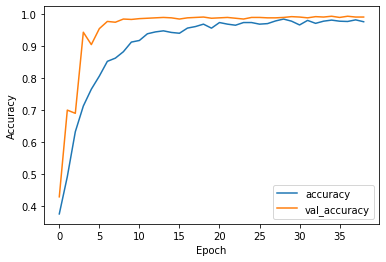

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

print('Training accuracy: %f' % history.history['accuracy'][-1])
print('Validation accuracy: %f' % history.history['val_accuracy'][-1])

**# Predict Image**

Saving scissors (15).png to scissors (15) (2).png
scissors (15).png
scissors


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


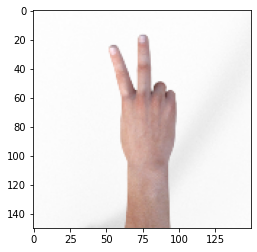

In [ ]:
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes=='paper':
    print('paper')
  elif classes=='rock':
    print('rock')
  else:
    print('scissors')